# Adam's NIR-spectra

### Task
The goal is to determine a quantity of interest, for instance, protein content of milk, from spectrometer measurements.

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import matplotlib.cm as cm
import matplotlib as mpl
from scipy.signal import savgol_filter

### Load Data

The data for this assignment consists of the following columns (in this particular order):
* Sample number.
* The quantity to predict.
* The rest of the columns are the spectral data.

In [18]:
df=pd.read_csv('cal 2018.csv',delimiter=';',header=None).drop(0,'columns') # load data
df.columns=np.arange(0,len(df.columns)) # rename columns
df=df.add_prefix('X') # prefix X to column names
df=df.rename(columns={df.columns[0]: "y" }) # rename first column to y, this is the column to be predicted

### Dataset Preview

The quantity to predict is labeled as 'y' and the spectral features are in columns 'X1'-'X680'.

In [19]:
# Show dataframe head
df.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680
0,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,0.566125,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
1,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,0.937514,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574
2,12.000000,0.611137,0.609566,0.607430,0.604767,0.601434,0.597316,0.592598,0.586992,0.580741,...,0.116174,0.115513,0.114890,0.114354,0.113720,0.113223,0.112702,0.112212,0.111764,0.111432
3,13.844976,0.342604,0.343687,0.344696,0.345664,0.346574,0.347402,0.348187,0.348870,0.349470,...,0.084568,0.084324,0.084156,0.084029,0.083939,0.083858,0.083770,0.083700,0.083641,0.083626
4,19.299999,0.760703,0.760871,0.761004,0.761058,0.761009,0.760830,0.760615,0.760404,0.760069,...,0.309897,0.307698,0.305618,0.303555,0.301619,0.299720,0.297918,0.296330,0.294762,0.293355


In [20]:
# Basic stat description
df.describe()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680
count,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,...,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000
mean,31.247135,0.673552,0.673042,0.672289,0.671280,0.669945,0.668317,0.666428,0.664173,0.661742,...,0.180276,0.179063,0.177920,0.176871,0.175921,0.175057,0.174249,0.173527,0.172905,0.172366
std,20.044317,0.177404,0.176938,0.176444,0.175918,0.175353,0.174777,0.174194,0.173637,0.173111,...,0.099334,0.098570,0.097812,0.097090,0.096401,0.095744,0.095132,0.094552,0.094031,0.093534
min,3.060644,0.225217,0.226202,0.227226,0.228200,0.229130,0.230069,0.230942,0.231759,0.232572,...,0.031046,0.030999,0.030906,0.030781,0.030699,0.030650,0.030605,0.030532,0.030445,0.030424
25%,13.096103,0.561772,0.560873,0.560031,0.558322,0.556361,0.553321,0.550164,0.545606,0.540858,...,0.099678,0.099215,0.098735,0.098217,0.097774,0.097524,0.097338,0.097088,0.097002,0.096858
50%,22.770000,0.715334,0.714612,0.714208,0.713636,0.712055,0.710524,0.708472,0.705815,0.702930,...,0.155023,0.154046,0.153240,0.152510,0.151948,0.151446,0.151025,0.150611,0.150263,0.149869
75%,51.250000,0.813234,0.812471,0.812104,0.811087,0.809613,0.807882,0.806053,0.804372,0.802689,...,0.271536,0.269194,0.267222,0.265850,0.264328,0.262811,0.261621,0.260589,0.259669,0.258567
max,76.603981,1.177985,1.175869,1.173260,1.169968,1.166016,1.161484,1.156248,1.150484,1.144481,...,0.426555,0.423630,0.420794,0.418019,0.415396,0.412957,0.410568,0.408270,0.406054,0.403849


In [21]:
# No NAN values
df.isna().sum().sum()

0

##### Output variable y

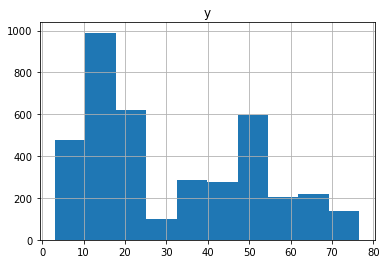

In [22]:
# Plot distribution of the output variable y
df.hist(column='y');

##### Spectral features X

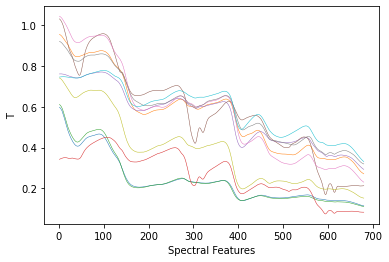

In [23]:
# Plot spectra of first few samples
n_samp=10
x_data=np.arange(1,len(df.columns));
y_data=df.iloc[0:n_samp,1:].transpose().to_numpy();
plt.plot(x_data,y_data,linewidth=0.5);
plt.xlabel('Spectral Features');
plt.ylabel('T');

##### Spectral features X and its transforms
* Not suprisingly, the above plot shows that different samples seems to have different offsets imposed on the spectral data
* As literature suggests, one way how to compensate for this is to take the derivative of the spectra
* Therefore, as well as examining the raw data, I also wanted to look at the derivative of the raw data - as this seems to be common for machine learning with nirs 
* The Savgol filter is used for obtaining the second derivative of the data - this infers the derivative of the data using a polynomial and has previously been used on nirs data [[1]](https://www.researchgate.net/profile/Jari-Torniainen/publication/339306593_Open-Source_Python_Module_for_Automated_Preprocessing_of_Near_Infrared_Spectroscopic_Data/links/5fc4b380299bf104cf950354/Open-Source-Python-Module-for-Automated-Preprocessing-of-Near-Infrared-Spectroscopic-Data.pdf), [[2]](https://discovery.ucl.ac.uk/id/eprint/10053349/1/Fearn_Modern%20practical%20convolutional%20neural%20networks%20for%20multivariate%20regression.%20Applications%20to%20NIR%20calibration_AAM.pdf)

In [24]:
# Taking derivative of the spectral features -X 
df_diff=df.drop(columns=['y'])
df_diff=df_diff.diff(periods=1, axis=1)
df_diff=df_diff.drop(columns=['X1'])
df_diff.insert(loc=0, column='y', value=df['y'])  

# savgol_filter of the spectral features -X 
df_savg=df.drop(columns=['y'])
df_savg=savgol_filter(df_savg, 11, polyorder = 2,deriv=2)
df_savg=pd.DataFrame(df_savg)
df_savg.insert(loc=0, column='y', value=df['y'])

In [25]:
preprocess_dict = {'Raw':df,'Derivative':df_diff, 'SavgolDeriv':df_savg}

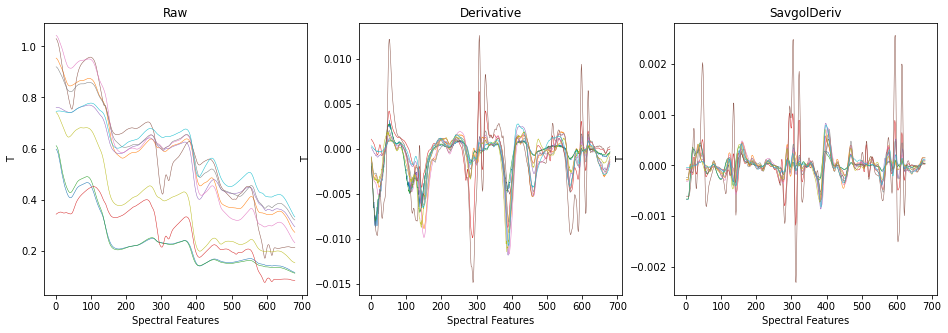

In [26]:
# Plot X for first few samples
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
plt_count=0
for value in preprocess_dict:
    df_data = preprocess_dict[value]

    n_samp=10
    x_data=np.arange(1,len(df_data.columns));
    y_data=df_data.iloc[0:n_samp,1:].transpose().to_numpy();
    ax[plt_count].plot(x_data,y_data,linewidth=0.5);
    ax[plt_count].set_xlabel('Spectral Features');
    ax[plt_count].set_ylabel('T');
    ax[plt_count].set_title(value)
    plt_count +=1
plt.show()

* These plots show that taking the derivative of the data deals with the offset

##### Spectral features X versus y

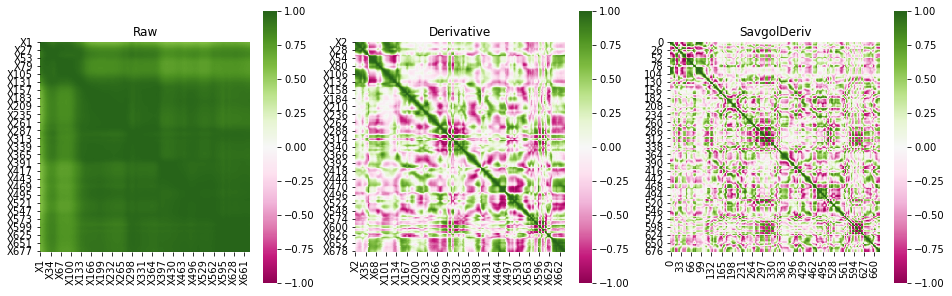

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
plt_count=0
for value in preprocess_dict:
    
    df_data = preprocess_dict[value]
    
    # Correlation matrix of X data
    df_corrmat=df_data.corr()
    sns.heatmap(df_corrmat.iloc[1:,1:],cmap="PiYG",square=True,vmin=-1, vmax=1, ax=ax[plt_count]);
    ax[plt_count].set_title(value)
    
    plt_count +=1

plt.show()

* The cross-correlation plots show how taking the derivative helps with the multicollinearity inherently present in the data
* However there is still large correlations across features, taking the second derivative using the savgol filter appears to reduce this further

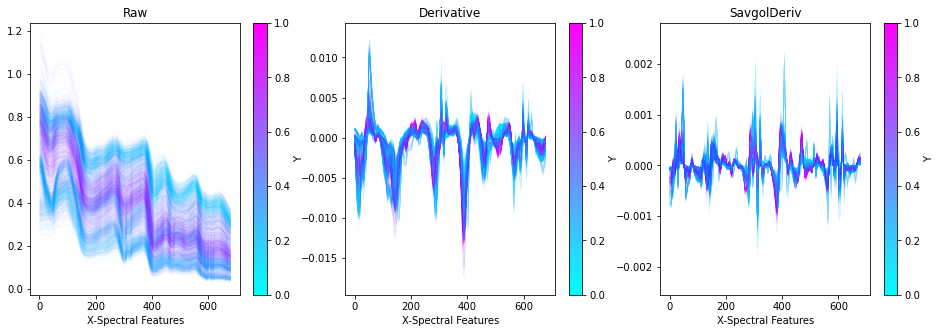

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
plt_count=0
for value in preprocess_dict:
    
    df_data = preprocess_dict[value]
    x_data=np.arange(1,len(df_data.columns))
    
    y_data=df_data.iloc[0:,1:].transpose()
    
    # get color from y quantity
    color_val=df_data['y'].copy() 
    color_val-= color_val.min() # sub min
    color_val /= color_val.max() # div by max

    for i in range(y_data.shape[1]):
        ax[plt_count].plot(x_data,y_data[i],color=cm.cool(color_val[i]),linewidth=0.01)
    
    # creating ScalarMappable  
    cbar=plt.colorbar(plt.cm.ScalarMappable(cmap=cm.cool), ax=ax[plt_count]) 
    cbar.ax.set_ylabel('Y')
    ax[plt_count].set_xlabel("X-Spectral Features")
    ax[plt_count].set_title(value)
    
    plt_count +=1

plt.show()

* These plots show the y-value (which is color coded) for each of the observations
* In the raw plot, there is some visible separation in the data whereby the observations plotted in the middle generally correspond to higher y-values than those on the extremities
* In the derivative plot, there are some x values for which there is visible separation between observations with low and high y-values (blue and purple respectively)
* The Savgol derivative plots looks similar to the derivative plot

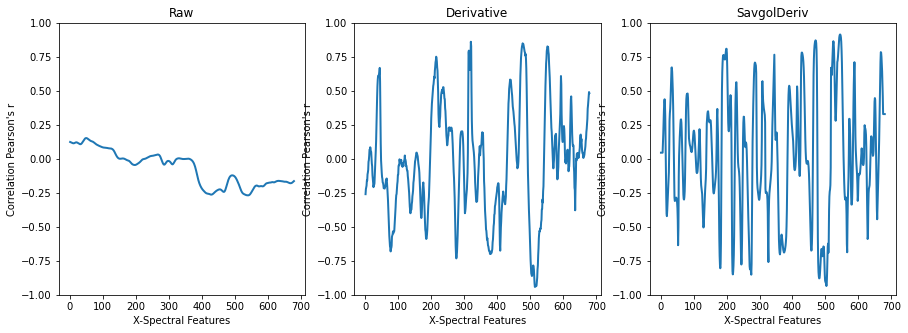

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
plt_count=0
for value in preprocess_dict:
    
    df_data = preprocess_dict[value]
    df_corrmat=df_data.corr()
    
    x_data=np.arange(1,len(df_corrmat.columns))
    
    y_data=df_corrmat.iloc[1:,0].to_numpy()
    
    ax[plt_count].plot(x_data,y_data,linewidth=2)
    ax[plt_count].set_xlabel("X-Spectral Features")
    ax[plt_count].set_ylabel("Correlation Pearson's r")
    ax[plt_count].set_ylim([-1,1])
    ax[plt_count].set_title(value)
    plt_count +=1

plt.show()

* To get a better idea of how each feature is related to the value to be predicted, I calculated the correlation between each feature and the y values
* The raw plot has very low correlation with the y-value
* The derivative and Savgol derivatives however have very high correlations with the y-values - particularly the feature around 500 has an almost perfect negative correlation with the y-data

#### Comment on the exploratory analysis
* The provided NIR data seems to have some offset that is not directly related to the predicted quantity
* Taking the derivative of the spectral features seems like a promising way of preprocessing the data. This approach has also been successfully used before by other papers

# Regression

### Regression model / Input data selection

In this section, I describe the process of fitting a regression model that predicts the quantity y based on the spectral data x. 

The models are fitted/optimized using nested cross-validation approach. The outer cross-validation fold makes sure we evaluate the model performance on data that was not used during the model fitting stage. The inner cross-validation is present for hyperparameter tuning. See e.g.
https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

Several linear and one non-linear regression models were tested. I have also tested different preprocessing methods. Finally, I briefly touched the area of feature importance and selection process. 


In [426]:
# Prepare grid with models and input data 
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Support class to hold the model and its parameters
class RegModel:
    def __init__(self, model, hyperparam):
        self.model = model
        self.hyperparam = hyperparam   
        
# List of regression models to be tested        
models=[]    
models.append(('LR-', RegModel(LinearRegression(),dict()))) 
models.append(('PLS', RegModel(PLSRegression(),{"n_components":[5,10,50,100],'max_iter':[1000],'tol':[1e-6,1e-12]})))
models.append(('LRR', RegModel(Ridge(),{"alpha":[1e-3,1e-2, 1]})))
models.append(('SVR', RegModel(SVR(),{"C":[1000],'gamma':[0.1]})))

    
# Differently preprocessed datasets
data_dict={"Raw":df,"Df1":df_diff,"Sav":df_savg}

In [427]:
# Loop across datatype and models
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error,r2_score
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid

# Select metric to optimize
score_fcn = make_scorer(mean_squared_error,greater_is_better=False)

# Prepare grid 
param_grid = {'models': models, 'inputdata': list(data_dict.keys())}
grid = list(ParameterGrid(param_grid))

result_df = pd.DataFrame([])

# Loop across search grid
for params in grid:
    
    # Unpack param and model
    source_name=params['inputdata']
    source_df=data_dict[params['inputdata']];
    name=params['models'][0];
    regmodel=params['models'][1];
    
    # Get X and y
    y = source_df['y'].values
    X = source_df.drop(['y'], axis=1).values

    # Normalize
    scaler = preprocessing.MinMaxScaler()

    # Define k-fold cross-validation
    cval = KFold(n_splits=5, shuffle=True,random_state=1)  
    cval.get_n_splits(X,y)  

    # Outer Cross-Validation 
    outer_mse = list()
    outer_r2 = list()
    
    for train_ix, test_ix in cval.split(X):


        # Data split
        X_train, X_test = X[train_ix, :], X[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]

        # Normalize
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Inner Cross-Validation for Hyper-param search
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)

        # Model and param space
        hyper_space = regmodel.hyperparam
        model = regmodel.model 

        # Tune model/hyperparam
        search = GridSearchCV(model, hyper_space, scoring=score_fcn, cv=cv_inner, refit=True)
        result = search.fit(X_train, y_train)
        best_model = result.best_estimator_

        # Run the best model
        y_pred=best_model.predict(X_test)

        # Calc metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        outer_mse.append(mse)
        outer_r2.append(r2)
    
    # Average results across folds
    mean_mse=np.mean(outer_mse);
    mean_r2=np.mean(outer_r2);
    print(str(best_model)+', Data: '+source_name+', '+ 'mse: %.3f r-squared: %.3f' % (mean_mse, mean_r2))
    result_df =result_df.append(pd.DataFrame({'Model':str(result.best_estimator_),'Data':source_name,'mse':mean_mse,'r2':mean_r2}, index=[1]), ignore_index=True)
    
    # keep the best model across models
    if result_df.empty:
        grand_model=best_model
    else:
        if sum(mean_mse>result_df['mse'])==0:
            grand_model=best_model

LinearRegression(), Data: Raw, mse: 2.779 r-squared: 0.993
PLSRegression(max_iter=1000, n_components=100), Data: Raw, mse: 2.631 r-squared: 0.993
Ridge(alpha=0.001), Data: Raw, mse: 3.428 r-squared: 0.991
SVR(C=1000, gamma=0.1), Data: Raw, mse: 1.254 r-squared: 0.997
LinearRegression(), Data: Df1, mse: 2.796 r-squared: 0.993
PLSRegression(max_iter=1000, n_components=50), Data: Df1, mse: 2.494 r-squared: 0.994
Ridge(alpha=0.01), Data: Df1, mse: 2.355 r-squared: 0.994
SVR(C=1000, gamma=0.1), Data: Df1, mse: 0.804 r-squared: 0.998
LinearRegression(), Data: Sav, mse: 2.861 r-squared: 0.993
PLSRegression(max_iter=1000, n_components=50), Data: Sav, mse: 2.475 r-squared: 0.994
Ridge(alpha=0.001), Data: Sav, mse: 2.393 r-squared: 0.994
SVR(C=1000, gamma=0.1), Data: Sav, mse: 0.796 r-squared: 0.998


### Regression results

In [430]:
result_df.sort_values(by='mse')

,Model,Data,mse,r2
11,"SVR(C=1000, gamma=0.1)",Sav,0.795783,0.998008
7,"SVR(C=1000, gamma=0.1)",Df1,0.803812,0.997986
3,"SVR(C=1000, gamma=0.1)",Raw,1.253645,0.996858
6,Ridge(alpha=0.01),Df1,2.354815,0.994135
10,Ridge(alpha=0.001),Sav,2.393398,0.994039
9,"PLSRegression(max_iter=1000, n_components=50)",Sav,2.475000,0.993836
5,"PLSRegression(max_iter=1000, n_components=50)",Df1,2.494244,0.993789
1,"PLSRegression(max_iter=1000, n_components=100)",Raw,2.631002,0.993438
0,LinearRegression(),Raw,2.778991,0.993073
4,LinearRegression(),Df1,2.796463,0.993030


* Here, we see that the winning combination of model and input data is SVR/RBF together with the Savgol filter 2nd derivative of the spectral data. The best result had mse=0.79 and R^2=0.99, which is very good (and I wish I saw such results during my PhD ;-). 
* Also, when looking at the correlation plot between the filtered spectral data and the output variable y in the exploratory analysis above, the good results are not very surprising.  

### Comment on models:

* Unlike all other tested models, the SVR model was non-linear. This suggest that the relationship between the input/output data is not very linear and it would make sense (if we have the resources) to use a nonlinear model.
* Also, please note that the I have not performed proper hyper-paramater tuning of the models due to time-constrains. Therefore, the results would likely change.

* Nevertheless, in my opinion, the other (linear) models performed quite well and might be useful if we dont want to spend too much training and optimizing more complicated models. See examples below.

### Comment on the source data:

* Besides performing regression on a raw data, I also tried to calculate derivative and to apply Savitzky-Golay(Sav) filter as literature suggests. The best performance was reached using the Sav, which again makes sense when you look at the correlation plot between the spectral data and the variable y we are trying to predict.   

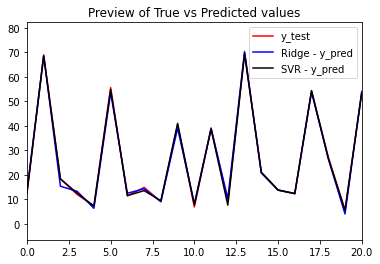

In [438]:
# Check visually how results look like for the SVR and Ridge regression
# Ridge
ridgemodel=Ridge(alpha=0.01)
model=ridgemodel
pred=model.fit(X_train, y_train)
y_pred_ridge=model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)

# SVR
model=grand_model
pred=model.fit(X_train, y_train)
y_pred_svr=model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred)

#import matplotlib.pyplot as plt
plt.plot(y_test,'r');
plt.plot(y_pred_ridge,'b');
plt.plot(y_pred_svr,'k');

plt.xlim([0,20]);
plt.legend(['y_test','Ridge - y_pred','SVR - y_pred']);
plt.title('Preview of True vs Predicted values');

### Feature selection

* In this step I wanted to investigate spectral features are driving the regression. Some insight into this can be obtained from the exploratory analysis above- specificaly from the correlation plot between the spectral features X and the y series. Several spectral features there have pearson's r close to maximum value of one e.g., look at correlation at around point 500.

<br/>

* Another way to judge the feature importance is to look at the regression model itself. Below you can see normalized model weights plotted for the ridge regression model. The absolute value of these weights should roughly correspond to feature importance... 
* However, looking at the plot it seems there no apparent spectral region that would be driving the regression and it seems that plenty of spectral components are contributing. 
* Note that the non-linear SVR model weights are not intepretable this way.

<br/>

* Also, I have tried to perform a more sophisticated feature selection/analysis using sklearn.feature_selection. See figure below. 
* Using this method I have tried to run the SVR regresion model only on K most important features selected by a correlation measure. 
* Feature reduction/selection seems to have a possitive effect on the regression performance, it would be worth it to investigate it in the future.
* Finally, method also outputs feature importance- again, there is something interesting happening in the spectral region of 500 [units]

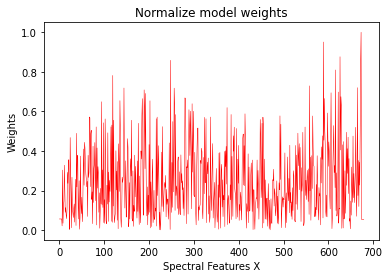

In [450]:
# Normalize model weights ~ feature importance
coefs=ridgemodel.coef_
coefs=abs(coefs/np.max(coefs))
plt.plot(coefs,color='r',linewidth=0.5);
plt.xlabel('Spectral Features X');
plt.ylabel('Weights');
plt.title('Normalize model weights');
plt.show()


In [451]:
# More sofisticated feature selection/analysis using sklearn

#This was inspired by https://machinelearningmastery.com/feature-selection-for-regression-data/

#https://machinelearningmastery.com/feature-selection-for-regression-data/
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression,f_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error,r2_score
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

source_df=df_diff.copy()

# Get X and y
y = source_df['y'].values
X = source_df.drop(['y'], axis=1).values

# Normalize
scaler = preprocessing.MinMaxScaler()

# Define k-fold cross-validation
cval = KFold(n_splits=5, shuffle=True,random_state=1)  
cval.get_n_splits(X,y)  

# Outer Cross-Validation 
outer_mse = list()
outer_r2 = list()

# Select metric to optimize
score_fcn = make_scorer(mean_squared_error,greater_is_better=False)

# feature selection
def select_features(X_train, y_train, X_test, method, n_comp):
    # configure to select a subset of features
    fs = SelectKBest(score_func=method, k=n_comp)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Prepare grid
selmethod_dict={"f_regression":f_regression}#,"mutual_info_regression":mutual_info_regression}


# Loop across search grid
result_df = pd.DataFrame([])
param_grid = {'k': [100, 200, 400], 'method':list(selmethod_dict.keys())}
grid = list(ParameterGrid(param_grid))

for params in grid:
    for train_ix, test_ix in cval.split(X):

        # Unpack the grid
        n_comp=params['k']
        method_name=params['method'];
        method=selmethod_dict[method_name];
        
        # Data split
        X_train, X_test = X[train_ix, :], X[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]

        # Normalize
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Select N features
        X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,method,n_comp)
        
        # Inner Cross-Validation for Hyper-param search
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)

        # Model and param space
        model = SVR()
        
        hyper_space = dict()
        hyper_space={"C":[1000],'gamma':[0.1]}
        
        # Tune model/hyperparam
        search = GridSearchCV(model,hyper_space, scoring=score_fcn, cv=cv_inner, refit=True)
        result = search.fit(X_train_fs, y_train)
        best_model = result.best_estimator_

        # Run the best model
        y_pred=best_model.predict(X_test_fs)

        # Calc metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        outer_mse.append(mse)
        outer_r2.append(r2)
        

        
    # Average results across folds
    mean_mse=np.mean(outer_mse);
    mean_r2=np.mean(outer_r2);
    print('Selection method: '+ method_name+', N_Comp: '+str(n_comp)+', mse: %.3f r-squared: %.3f' % (mean_mse, mean_r2))
    result_df =result_df.append(pd.DataFrame({'Method':method_name,'N_Comp':str(n_comp),'mse':mean_mse,'r2':mean_r2}, index=[1]), ignore_index=True)


Selection method: f_regression, N_Comp: 100, mse: 0.803 r-squared: 0.998
Selection method: f_regression, N_Comp: 200, mse: 0.724 r-squared: 0.998
Selection method: f_regression, N_Comp: 400, mse: 0.692 r-squared: 0.998


In [452]:
result_df.sort_values(by='mse')

,Method,N_Comp,mse,r2
2,f_regression,400,0.692428,0.998271
1,f_regression,200,0.723713,0.998196
0,f_regression,100,0.803303,0.997999


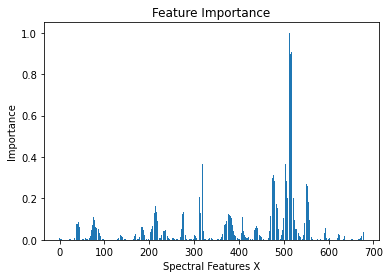

In [449]:
scores_norm=fs.scores_/np.max(fs.scores_)
plt.bar([i for i in range(len(scores_norm))], scores_norm)
plt.xlabel('Spectral Features X');
plt.ylabel('Importance');
plt.title('Feature Importance');
plt.show()

### Conclusion

* It seems that the (mystical) Y measure can be successfully predicted from the spectral data.
* Although, the linear models had decent performance, the data are better modeled using non-linear methods.
* Some frequency features are better than others, it would be worth exploring this more.
* All models were tuned in a coarse way, the results should be taken with pinch of salt.
* An Interesting approach might be to apply a CNN on the problem as it could simplify data preprocessing.
See:
https://doi.org/10.1016/j.chemolab.2018.07.008 / https://discovery.ucl.ac.uk/id/eprint/10053349/1/Fearn_Modern%20practical%20convolutional%20neural%20networks%20for%20multivariate%20regression.%20Applications%20to%20NIR%20calibration_AAM.pdf

* I had good fun doing this task... :)